In [1]:
import gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import pickle

In [2]:
#use wordnet lemmatizor, gensims lemmatizer is deactivated
from nltk.stem import WordNetLemmatizer

In [3]:
#read in file
with open('../data/data_simple_preprocess/complete_corpus_simple_preprocess_sw_removed.txt', 'rb') as file:
    complete_corpus_simple_preprocess_sw_removed = pickle.load(file)

In [4]:
wnl = WordNetLemmatizer()

In [5]:

complete_corpus_simple_preprocess={}

for key, value in complete_corpus_simple_preprocess_sw_removed.items():
    a_string = ''.join(value)
    lemmatized=' '.join([wnl.lemmatize(word) for word in a_string.split()]) #cant lemmatize over a simple call.  Need a list comprehension, similar to the tagged docs
    complete_corpus_simple_preprocess[key]=lemmatized

In [6]:
complete_corpus_simple_preprocess=complete_corpus_simple_preprocess_sw_removed

In [7]:
# Prepare data for Doc2Vec
tagged_data = [TaggedDocument(words=(text), tags=[title]) for title, text in complete_corpus_simple_preprocess.items()]

In [8]:
# Train a Doc2Vec model
model = Doc2Vec(vector_size=20, min_count=1, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [9]:
# Function to get similarity matrix
def get_similarity_matrix(model, texts):
    titles = list(texts.keys())
    vectors = [model.dv[title] for title in titles]
    similarity_matrix = cosine_similarity(vectors)
    return titles, similarity_matrix

In [10]:
# Get similarity matrix
titles, similarity_matrix = get_similarity_matrix(model, complete_corpus_simple_preprocess)

In [11]:
# Print similarity matrix
print("Similarity Matrix:\n", similarity_matrix)

Similarity Matrix:
 [[1.0000001  0.45339113 0.3436883  ... 0.14514421 0.64427054 0.5539759 ]
 [0.45339113 1.         0.35250145 ... 0.18381406 0.57402825 0.44570273]
 [0.3436883  0.35250145 0.9999999  ... 0.42133093 0.33541447 0.32858294]
 ...
 [0.14514421 0.18381406 0.42133093 ... 0.9999999  0.29937387 0.09184922]
 [0.64427054 0.57402825 0.33541447 ... 0.29937387 0.9999999  0.3952293 ]
 [0.5539759  0.44570273 0.32858294 ... 0.09184922 0.3952293  1.        ]]


In [12]:
sim_matrix=pd.DataFrame(similarity_matrix)

In [13]:
counter = 0
for i in complete_corpus_simple_preprocess.keys():
    counter += 1
    if counter == 26:
        print(i)
        break

Old Testament


In [14]:

#The above is off. 0 is nothing. So...

# 2 is Bible
# 24 is New Testament
# 25 is Old Testament

In [15]:
bible_similarity=sim_matrix[[2,24,25]]

In [16]:
pd.set_option('display.max_columns', 50)
sim_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.453391,0.343688,0.386787,0.212307,-0.090557,0.338002,0.589248,0.559206,0.291990,0.279422,0.469768,0.681346,0.550773,0.240859,0.310133,0.291088,-0.048835,0.300938,0.317923,0.310528,0.190204,0.016919,0.531338,0.352901,0.339408,0.134490,0.511798,0.275370,0.128573,0.376074,0.268441,0.370469,0.271656,0.294459,0.304683,0.129205,0.413070,0.260268,0.643672,0.235959,0.320401,0.181051,0.145144,0.644271,0.553976
1,0.453391,1.000000,0.352501,0.353090,0.176469,0.262416,0.285380,0.403106,0.726074,0.192039,0.398817,0.386465,0.627402,0.510671,0.451282,0.436531,0.455225,0.070524,0.320657,0.280337,0.463634,0.013406,0.031873,0.649722,0.152981,0.351497,0.504739,0.293122,0.464625,0.075844,0.354127,0.312515,0.415274,0.379092,0.375781,0.438310,0.389703,0.289471,0.201248,0.441177,0.226353,0.340066,0.506561,0.183814,0.574028,0.445703
2,0.343688,0.352501,1.000000,0.237496,0.381634,0.335440,0.335485,0.253822,0.453766,0.402970,0.424855,0.399269,0.278030,0.367589,0.286620,0.392873,0.338921,0.374246,0.204439,0.299499,0.492498,0.364904,0.382586,0.207515,0.533439,0.999696,0.363940,0.313407,0.573599,0.315063,0.473187,0.412579,0.428220,0.410084,0.370568,0.416385,0.335368,0.223497,0.370036,0.272755,0.277006,0.277928,0.266911,0.421331,0.335414,0.328583
3,0.386787,0.353090,0.237496,1.000000,0.507226,0.285577,0.530012,0.133849,0.263041,0.287942,0.441191,0.369857,0.261533,0.374745,0.251251,0.315697,0.341428,0.145984,0.181902,0.225021,0.352704,0.196825,0.168887,0.539760,0.243654,0.237134,0.150944,0.421855,0.230972,0.129525,0.260180,0.501451,0.402020,0.434784,0.339654,0.302394,0.387589,0.407589,0.403759,0.348868,0.263162,0.158588,0.342274,0.126729,0.422326,0.459779
4,0.212307,0.176469,0.381634,0.507226,1.000000,0.396366,0.202166,0.160038,0.319289,0.317637,0.473668,0.485396,0.121067,0.419067,0.109428,0.290256,0.520296,0.237305,0.449239,0.482490,0.527366,0.284840,0.373887,0.089239,0.121251,0.383005,0.515155,0.252446,0.358048,0.174648,0.375429,0.452792,0.404519,0.467585,0.357229,0.380166,0.429335,0.224120,0.612309,0.417740,0.340353,0.309589,0.096954,0.551532,0.550202,0.034829
5,-0.090557,0.262416,0.335440,0.285577,0.396366,1.000000,0.641183,0.106325,0.066485,0.354493,0.253715,0.116772,0.140552,0.206528,0.518649,0.132284,0.272960,0.425368,0.114934,0.370112,0.365493,0.222652,0.317266,0.360119,0.257548,0.336200,0.477054,0.168876,0.473791,0.418132,0.172198,0.158212,0.122163,0.300741,0.105538,0.116344,0.260127,0.165151,0.301020,0.132677,0.255258,0.124653,0.435493,0.336313,0.283317,0.322395
6,0.338002,0.285380,0.335485,0.530012,0.202166,0.641183,1.000000,0.114002,0.123109,0.251657,0.353736,0.420088,0.327173,0.266149,0.657255,0.243962,0.283655,0.265819,-0.104057,0.403858,0.244713,0.226167,0.034501,0.555487,0.568820,0.335463,0.246170,0.211301,0.375743,0.198761,0.300887,0.360848,0.274135,0.416301,0.190182,0.162492,0.297715,0.172105,0.346416,0.136353,0.358581,0.131027,0.293153,0.296299,0.251398,0.398169
7,0.589248,0.403106,0.253822,0.133849,0.160038,0.106325,0.114002,1.000000,0.556387,0.534103,0.133080,0.455007,0.724349,0.366007,0.478296,0.094168,0.201976,0.278316,0.482485,0.267286,0.159823,0.219371,0.404428,0.586262,0.083997,0.245558,0.422412,0.413885,0.548136,0.582441,0.159485,0.053876,0.279488,0.245698,0.148114,0.285962,0.182062,0.620413,0.323711,0.837188,0.205248,0.461364,0.127374,0.277946,0.681138,0.467754
8,0.559206,0.726074,0.453766,0.263041,0.319289,0.066485,0.123109,0.556387,1.000000,0.272968,0.293626,0.542088,0.735623,0.336688,0.307660,0.361015,0.288641,0.266440,0.370011,0.235736,0.377212,0.228358,0.255855,0.416292,0.277863,0.456461,0.344442,0.638080,0.582417,0.203407,0.354519,0.313960,0.425703,0.390670,0.401138,0.493091,0.400620,0.395052,0.458628,0.596400,0.352649,0.519574,0.495157,0.474616,0.695047,0.247398
9,0.291990,0.192039,0.402970,0.287942,0.317637,0.354493,0.251657,0.534103,0.272968,1.000000,0.505192,0.155950,0.401782,0.42

In [17]:
bible_similarity=bible_similarity.rename(columns={2:"Bible Complete", 24:"New Testament", 25:"Old Testament"})

In [18]:
similarity_matrix2=similarity_matrix

In [19]:
with open('../pngs/similarity_matrix2.ndarray', 'wb') as file:
    pickle.dump(similarity_matrix2, file)
#with open('../pngs/titles.list', 'wb') as file:
#    pickle.dump(titles, file)

In [20]:
import matplotlib.cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

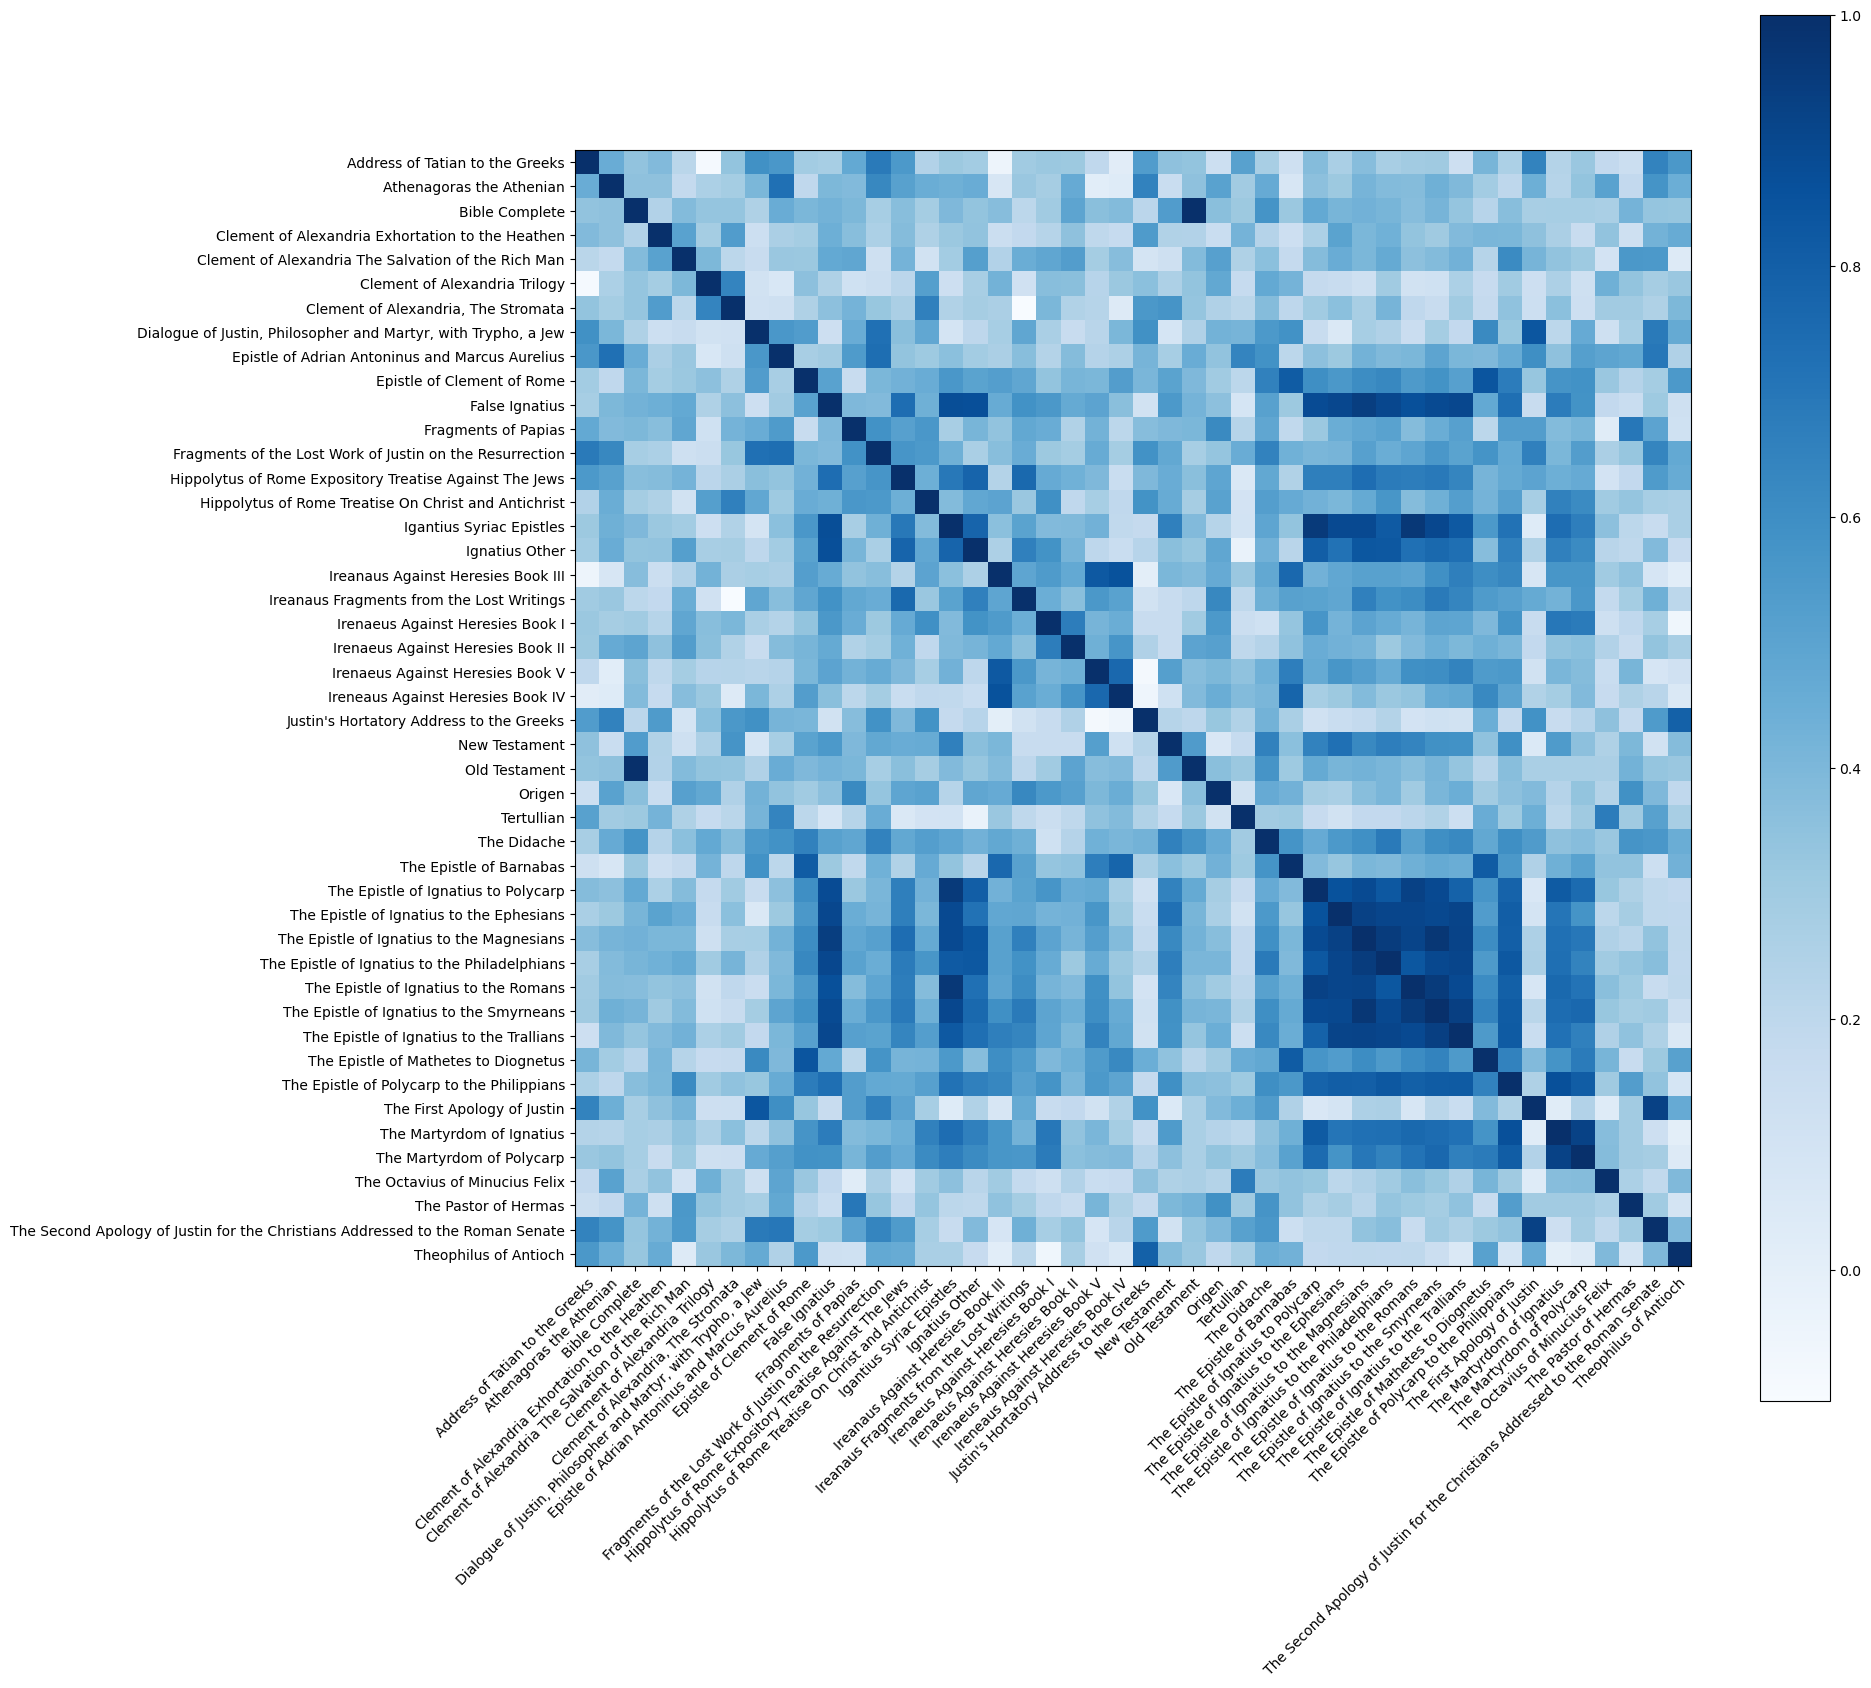

In [21]:
fig = plt.figure(figsize=(18,18))  # change the figsize to control the resolution
ax = fig.add_subplot(111)
cmap = matplotlib.colormaps['Blues']  # you may use other build-in colormap or define you own colormap
# if your data is not in range[0,1], use a normalization. Here is normalized by min and max values.
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
image = ax.imshow(similarity_matrix, cmap=cmap, norm=norm)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(titles)), labels=titles)
ax.set_yticks(np.arange(len(titles)), labels=titles)

#rotate right by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.colorbar(image)

plt.show()

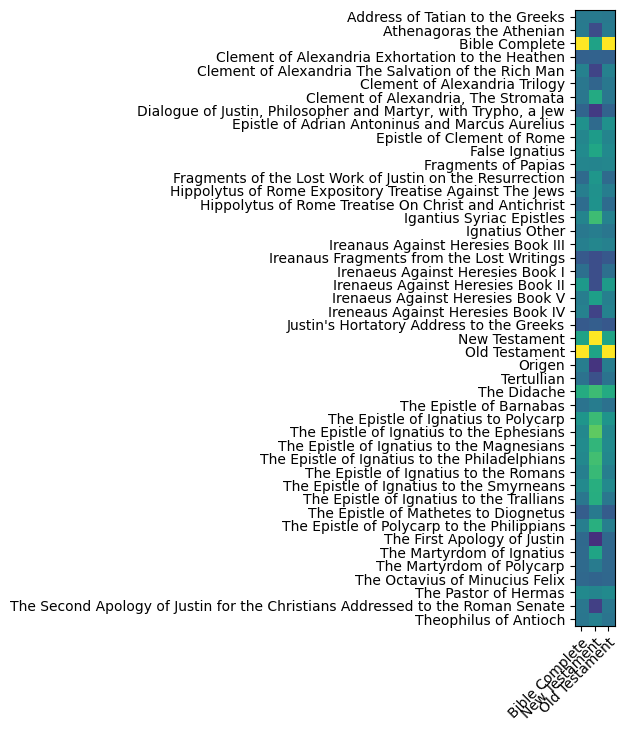

In [22]:
x_labels=['Bible Complete', 'New Testament', 'Old Testament']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im = ax.imshow(bible_similarity, norm=norm)
norm = Normalize(vmin=np.amin(similarity_matrix), vmax=np.amax(similarity_matrix))
ax.set_yticks(np.arange(len(titles)), labels=titles)
ax.set_xticks(np.arange(len(x_labels)), labels=x_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show();